# 2.1 - Más modelos USL

In [1]:
import pylab as plt
%matplotlib inline

from sklearn.datasets import make_moons

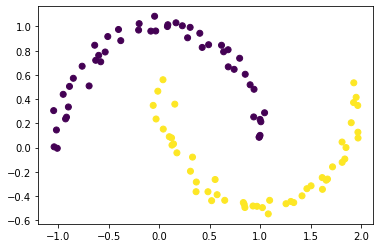

In [40]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)
plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1]);

# DBSCAN 

**Density Based Spatial Clustering of Applications with Noise**

![dbscan](images/dbscan.png)


DBSCAN requiere de dos parámetros:

+ $\epsilon$ : distancia de la vecindad
+ Número mínimo de puntos para considerarla vecindad

Se comienza con un punto arbitrario que no haya sido visitado. La $\epsilon$-vecindad de éste punto se evalúa, para determinar su densidad y si tiene suficientes puntos se clusteriza, si no, se considera que el punto es ruido.


**Ventajas**
+ No necesita saber el nº de clusters
+ Se reduce el single-link (un cluster dentro de otro)
+ Tiene noción del ruido (detecta muy bien outliers)
+ Solo dos parámetros


**Desventajas**
+ No es determinista en los límites del cluster
+ Depende de la distancia
+ No puede manejar grandes diferencias de densidad


In [3]:
from sklearn.cluster import DBSCAN

In [42]:
dbscan=DBSCAN()

#help(dbscan)

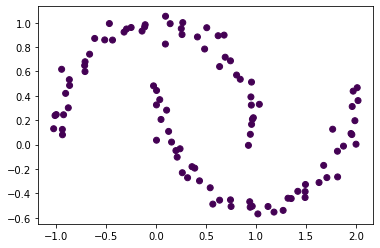

In [5]:
dbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=dbscan.labels_);

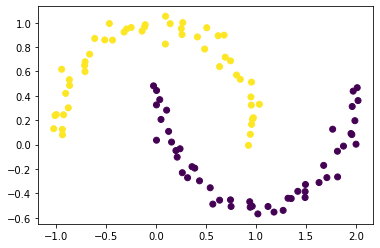

In [6]:
dbscan=DBSCAN(eps=0.25)
dbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=dbscan.labels_);

# HDBSCAN

**Hierarchical DBSCAN**

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Extiende DBSCAN haciéndolo jerárquico. El algoritmo se basa en:

1) Transformar el espacio según densidad

2) Grafo de árboles de distancias

3) Cluster jerárquicos

4) Condensar los clusters basándose en el tamaño

5) Extraer clusters estables desde el árbol

In [7]:
from hdbscan import HDBSCAN

In [8]:
hdbscan=HDBSCAN(gen_min_span_tree=True)

hdbscan

HDBSCAN(gen_min_span_tree=True)

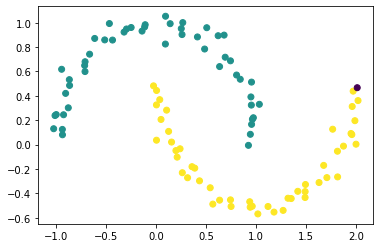

In [9]:
hdbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=hdbscan.labels_);

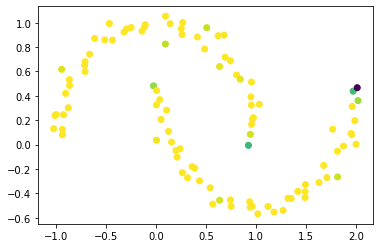

In [10]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=hdbscan.probabilities_);

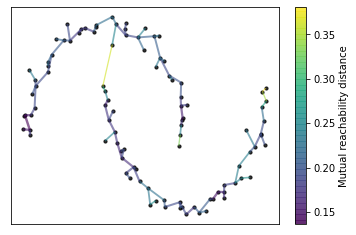

In [11]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                    edge_alpha=0.6,
                                    node_size=10,
                                    edge_linewidth=1.2);

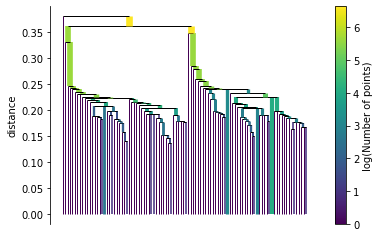

In [12]:
hdbscan.single_linkage_tree_.plot(cmap='viridis',
                                  colorbar=True);

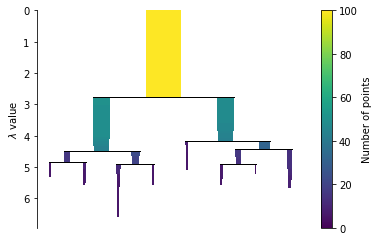

In [13]:
hdbscan.condensed_tree_.plot();

In [14]:
import seaborn as sns

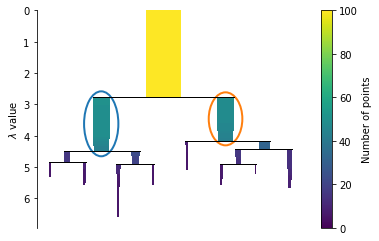

In [15]:
hdbscan.condensed_tree_.plot(select_clusters=True,
                             selection_palette=sns.color_palette());

# OPTICS

**Ordering Points To Identify the Clustering Structure**

Generalización del DBSCAN, busca el núcleo de la muestra con la más alta densidad y expande los clusteres desde ahí.

![optics](images/optics.png)

In [16]:
from sklearn.cluster import OPTICS

In [17]:
opt=OPTICS(max_eps=1)

opt

OPTICS(max_eps=1)

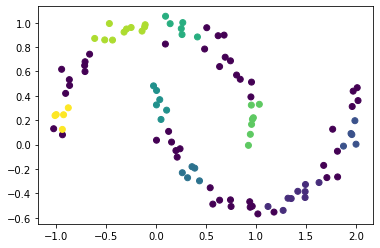

In [18]:
opt.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=opt.labels_);

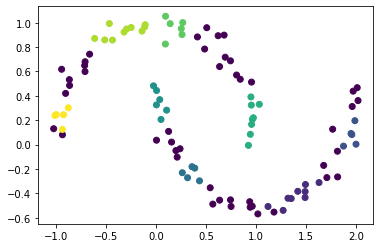

In [19]:
opt=OPTICS(eps=0.2, max_eps=0.25)
opt.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=opt.labels_);

# GMM

**Gaussian Mixture Models**

Se asume que los datos son mezclas de un nº finito de distribuciones gaussianas de parámetros desconocidos (N($\mu$,$\sigma$))


![gmm](images/gmm.png)


![gmm2](images/gmm2.png)

In [20]:
from sklearn.mixture import GaussianMixture as GM

In [21]:
gm=GM(n_components=2, covariance_type='full')

gm

GaussianMixture(n_components=2)

In [22]:
gm.fit(moons[0])

gm.means_

array([[-0.16371862,  0.63256678],
       [ 1.12762682, -0.12258252]])

In [23]:
gm.covariances_

array([[[0.34517822, 0.06116762],
        [0.06116762, 0.09287721]],

       [[0.35730278, 0.04187374],
        [0.04187374, 0.10252415]]])

In [24]:
gm.predict_proba(moons[0])[:5]

array([[8.96224738e-07, 9.99999104e-01],
       [8.39305464e-03, 9.91606945e-01],
       [2.28991453e-06, 9.99997710e-01],
       [9.43236126e-01, 5.67638745e-02],
       [9.99926698e-01, 7.33021561e-05]])

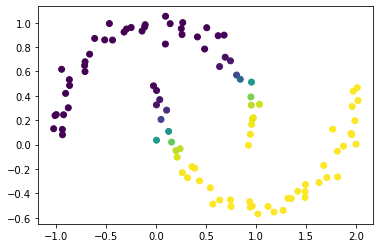

In [25]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=gm.predict_proba(moons[0])[:,1]);

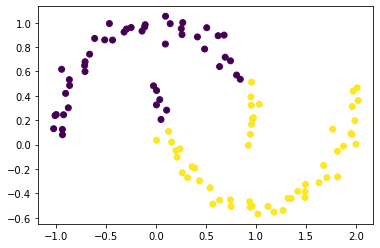

In [26]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=gm.predict(moons[0]));

In [27]:
from sklearn.datasets import make_classification as mc

In [28]:
X=mc(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

In [29]:
gm=GM(n_components=2, covariance_type='full')
gm.fit(X[0]);

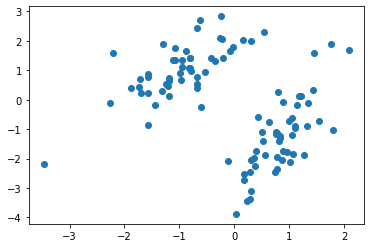

In [30]:
plt.scatter(X[0][:,0], X[0][:,1]);

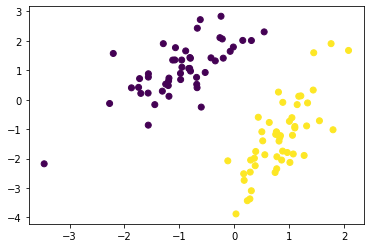

In [31]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict(X[0]));

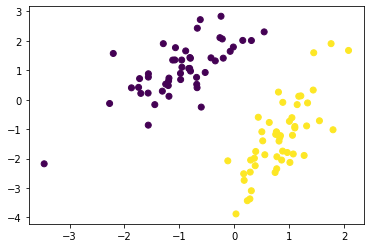

In [32]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict_proba(X[0])[:,1]);

![](data/usl_models.png)

![usl_models](images/usl_models.png)